# Preparations

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [3]:
# the smaller dataset
proj1_df=pd.read_csv('http://www.stat.uchicago.edu/~nicolae/118/PFI_2019.csv')
print(proj1_df.shape)
proj1_df.head(5)

(15500, 75)


,BASMID,ALLGRADEX,EDCPUB,SCCHOICE,SPUBCHOIX,SCONSIDR,SCHLHRSWK,EINTNET,MOSTIMPT,INTNUM,...,SEFUTUREX,DSBLTY,HHPARN19X,HHPARN19_BRD,NUMSIBSX,PARGRADEX,RACEETH,INTACC,CENREG,ZIPLOCL
0,20191000012,12,1,2,3,2,4,4,-1,-1,...,6,2,1,1,1,3,4,1,4,11
1,20191000029,4,1,2,3,2,4,3,-1,2,...,6,2,2,2,1,3,3,1,4,12
2,20191000059,11,2,2,2,1,4,3,2,2,...,5,2,2,2,1,5,2,3,2,11
3,20191000070,6,1,1,1,1,4,4,-1,-1,...,6,2,2,2,1,2,3,1,2,31
4,20191000078,9,1,2,3,2,4,4,-1,-1,...,6,2,1,1,1,5,5,1,2,21


# B (Family Characteristics) - Marriage Status

In [4]:
marriage = proj1_df[["P1MRSTA"]]
marriage = marriage.groupby(["P1MRSTA"])[["P1MRSTA"]].count()
marriage = marriage.rename(columns = {"P1MRSTA":"counts"})
marriage = marriage.sort_values(by = ["counts"], ascending = False)
marriage = marriage.reset_index()
marriage

,P1MRSTA,counts
0,1,10900
1,3,2174
2,5,1609
3,4,522
4,2,295


In [5]:
# calculations
## percentage of 1
sum_total = sum(marriage["counts"])
10900/sum_total
295/sum_total

0.01903225806451613

Text(0.5, 1.0, 'Distribution of Parent 1\nMarital Status')

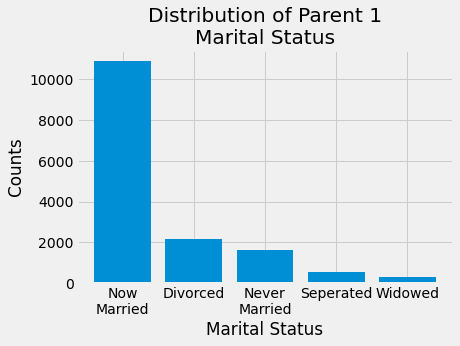

In [6]:
fig, ax = plt.subplots()
ax.bar(marriage.index, marriage["counts"])
ax.set_xticks(np.arange(5))
ax.set_xticklabels(["Now\nMarried","Divorced",
                    "Never\nMarried","Seperated","Widowed"])
ax.set_xlabel("Marital Status")
ax.set_ylabel("Counts")
ax.set_title("Distribution of Parent 1\nMarital Status")


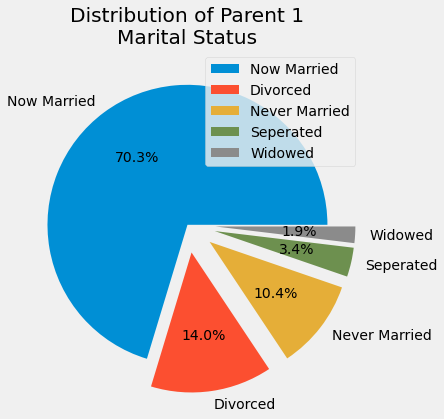

In [7]:
fig, ax = plt.subplots(figsize = (6,6))
xlabels = (["Now Married","Divorced","Never Married","Seperated","Widowed"])
myexplode = [0, 0.2, 0.2, 0.2, 0.2]
ax.pie(marriage["counts"], labels = xlabels, explode = myexplode, autopct='%1.1f%%',)

ax.set_title("Distribution of Parent 1\nMarital Status")
ax.legend()

# C (Student Characteristics)

## Language Spoken at Home

### Language and Public/Private Education

In [18]:
lanpp = proj1_df[["CSPEAKX", "EDCPUB"]]
lanpp = lanpp.groupby(["CSPEAKX", "EDCPUB"])[["EDCPUB"]].count()
lanpp = lanpp.rename(columns = {"EDCPUB":"counts"})
lanpp = lanpp.reset_index()

lanpp = lanpp.reset_index()[["CSPEAKX","EDCPUB","counts"]]
lanpp

#Divide into public and private school data
lanpp1 = lanpp[lanpp.EDCPUB == 1].reset_index()[["CSPEAKX","EDCPUB","counts"]]
lanpp2 = lanpp[lanpp.EDCPUB == 2].reset_index()[["CSPEAKX","EDCPUB","counts"]]

#Calculate Proportions
total_count1 = sum(lanpp1["counts"])
total_count2 = sum(lanpp2["counts"])

lanpp1["proportions1"] = lanpp1["counts"]/total_count1
lanpp2["proportions2"] = lanpp2["counts"]/total_count2

lanpp1 = lanpp1[lanpp1.CSPEAKX != 2].reset_index()
lanpp2 = lanpp2[lanpp2.CSPEAKX != 2].reset_index()

lanpp1




,index,CSPEAKX,EDCPUB,counts,proportions1
0,0,1,1,34,0.002467
1,2,3,1,397,0.028806
2,3,4,1,695,0.050428
3,4,5,1,172,0.012480
4,5,6,1,443,0.032143


In [20]:
abs(0.039581-0.032143)
0.007438/((0.039581+0.032143)/2)

#abs(0.002467-0.003492)
#0.001024999/((0.002467+0.003492)/2)

0.20740616808878481

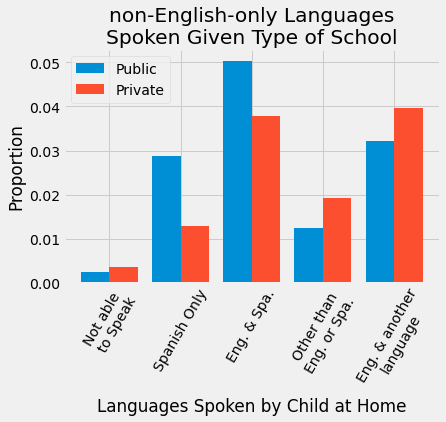

In [43]:
fig, ax = plt.subplots()
ax.bar(lanpp1.index, lanpp1["proportions1"], width = 0.4,
      label = "Public")
ax.bar(lanpp2.index+0.4, lanpp2["proportions2"], width = 0.4,
      label = "Private")

ax.set_xticks(np.arange(5)+ (0.4/2))
xlabels = ["Not able\n to Speak",
           "Spanish Only","Eng. & Spa.", 
           "Other than\nEng. or Spa.",
           "Eng. & another\nlanguage"]
ax.set_xticklabels(xlabels, rotation = 60)
ax.set_xlabel("Languages Spoken by Child at Home")
ax.set_ylabel("Proportion")
ax.set_title("non-English-only Languages\nSpoken Given Type of School")
ax.legend(loc = 2)



## Language and Grades

In [9]:
# Proportion of "Mostly As" in each language category

## set up df
langr = proj1_df[["CSPEAKX", "SEGRADES"]]
langr = langr.groupby(["CSPEAKX","SEGRADES"])[["SEGRADES"]].count()
langr = langr.rename(columns = {"SEGRADES":"counts"})
langr = langr.reset_index()
langr = langr[(langr.SEGRADES != -1) & (langr.SEGRADES != 5)] # valid skip, no grades drop

##proportion of Mostly A (SEGRADES==1)

mostlya = langr[langr.SEGRADES == 1].reset_index()[["CSPEAKX","counts"]]
mostlya = mostlya.rename(columns = {"counts":"A counts"})
studentcount1 = langr.groupby(["CSPEAKX"])[["counts"]].sum()
studentcount1 = studentcount1.reset_index()
mostlya["total students by language"] = studentcount1['counts']
mostlya["proportions"] = mostlya["A counts"]/mostlya["total students by language"]

mostlya

,CSPEAKX,A counts,total students by language,proportions
0,1,7,12,0.583333
1,2,6727,11845,0.567919
2,3,170,385,0.441558
3,4,304,684,0.444444
4,5,104,164,0.634146
5,6,307,443,0.693002


Text(0.5, 1.0, "Proportion of 'Mostly As'\nby language spoken")

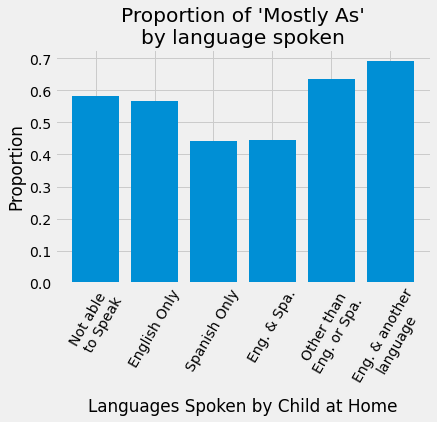

In [42]:
fig, ax = plt.subplots()
ax.bar(mostlya["CSPEAKX"], mostlya["proportions"])

ax.set_xticks(np.arange(1,7))
xlabels = ["Not able\n to Speak","English Only",
           "Spanish Only","Eng. & Spa.", 
           "Other than\nEng. or Spa.",
           "Eng. & another\nlanguage"]
ax.set_xticklabels(xlabels, rotation = 60)
ax.set_xlabel("Languages Spoken by Child at Home")
ax.set_ylabel("Proportion")
ax.set_title("Proportion of 'Mostly As'\nby language spoken")



# Using Internet for Learning

### Internet Use for Learning and Grades

In [11]:
netgr = proj1_df[["CHLDNT","SEGRADES"]]
netgr = netgr.groupby(["CHLDNT","SEGRADES"])[["CHLDNT"]].count()
netgr = netgr.rename(columns = {"CHLDNT":"counts"})
netgr = netgr.reset_index()
netgr = netgr[(netgr.SEGRADES != -1) & (netgr.SEGRADES != 5)] #valid skip, no grade drop

# proportion of mostly A
mostlya1 = netgr[netgr.SEGRADES == 1].reset_index()[["CHLDNT", "counts"]]
mostlya1 = mostlya1.rename(columns = {"counts":"A counts"})
studentcount2 = netgr.groupby(["CHLDNT"])[["counts"]].sum()
studentcount2 = studentcount2.reset_index()
mostlya1["total students by internet use"] = studentcount2['counts']
mostlya1["proportions"] = mostlya1["A counts"]/mostlya1["total students by internet use"]

mostlya1["CHLDNT"] = 6 - mostlya1["CHLDNT"]
mostlya1


,CHLDNT,A counts,total students by internet use,proportions
0,5,4452,7511,0.592731
1,4,2344,4324,0.542091
2,3,496,934,0.531049
3,2,101,237,0.426160
4,1,226,527,0.428843


Text(0.5, 1.0, "Proportion of 'Mostly As' by\n Child's use of internet for learning at home")

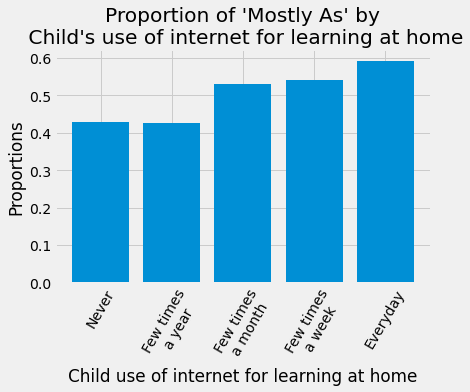

In [12]:
fig, ax = plt.subplots()
ax.bar(mostlya1["CHLDNT"], mostlya1["proportions"])
xlabels = ["Never", "Few times\na year","Few times\na month","Few times\na week","Everyday"]
ax.set_xticks(np.arange(1,6))
ax.set_xticklabels(xlabels, rotation = 60)
ax.set_xlabel("Child use of internet for learning at home")
ax.set_ylabel("Proportions")
ax.set_title("Proportion of 'Mostly As' by\n Child's use of internet for learning at home")



## Internet use for Learning and Disability

In [13]:
netdis = proj1_df[["CHLDNT","DSBLTY"]]
netdis = netdis.groupby(["CHLDNT","DSBLTY"])[["CHLDNT"]].count()
netdis = netdis.rename(columns = {"CHLDNT":"counts"})
netdis = netdis.reset_index()

## setting with w/ w/o disability df
netdis1 = netdis[netdis.DSBLTY == 1]
netdis2 = netdis[netdis.DSBLTY == 2]

netdis1 = netdis1.reset_index()
netdis2 = netdis2.reset_index()

## calculating net use given disability or not
total_count1 = sum(netdis1["counts"])
netdis1["conditional prob"] = netdis1["counts"]/total_count1
netdis1["CHLDNT"] = 6 - netdis1["CHLDNT"]
netdis1

total_count2 = sum(netdis2["counts"])
netdis2["conditional prob"] = netdis2["counts"]/total_count2
netdis2["CHLDNT"] = 6 - netdis2["CHLDNT"]
#netdis2
netdis1

,index,CHLDNT,DSBLTY,counts,conditional prob
0,0,5,1,1809,0.482915
1,2,4,1,1265,0.337694
2,4,3,1,337,0.089963
3,6,2,1,93,0.024826
4,8,1,1,242,0.064602


In [14]:
abs(0.018972-0.024826)
0.0058540000000000016/((0.018972+0.024826)/2)

0.2673181423809307

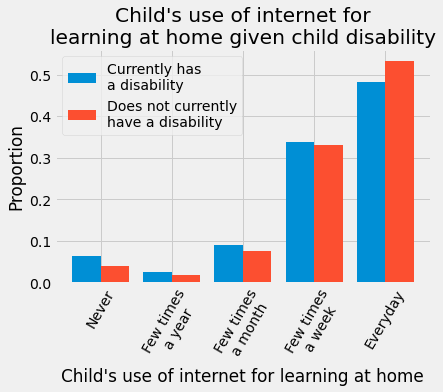

In [15]:
fig, ax = plt.subplots()
ax.bar(netdis1["CHLDNT"], netdis1["conditional prob"],
      label = "Currently has\na disability", width = 0.4)
ax.bar(netdis2["CHLDNT"]+0.4, netdis2["conditional prob"],
      label = "Does not currently\nhave a disability", width = 0.4,)

ax.set_xticks(np.arange(1,6)+ (0.4/2))
xlabels = ["Never", "Few times\na year","Few times\na month","Few times\na week","Everyday"]
ax.set_xticklabels(xlabels, rotation = 60)
ax.set_xlabel("Child's use of internet for learning at home")
ax.set_ylabel("Proportion")
ax.set_title("Child's use of internet for\nlearning at home given child disability")
ax.legend(loc = 0)


# Family Involvement and Success

## Dinner and Enjoyment

In [90]:
dinnerjoy = proj1_df[["FODINNERX","SEENJOY"]]
dinnerjoy = dinnerjoy[dinnerjoy.SEENJOY != -1]
dinnerjoy = dinnerjoy.groupby(["FODINNERX","SEENJOY"])[["SEENJOY"]].count()
dinnerjoy = dinnerjoy.rename(columns = {'SEENJOY':"counts"})
dinnerjoy = dinnerjoy.reset_index()

enjoys = dinnerjoy[(dinnerjoy.SEENJOY == 1)]

total_count3 = dinnerjoy.groupby(["FODINNERX"])[["counts"]].sum()
enjoys = enjoys.groupby(["FODINNERX"])[["counts"]].sum()

enjoys["total counts"] = total_count3["counts"]
enjoys["proportions"] = enjoys["counts"]/enjoys["total counts"]

enjoys


,counts,total counts,proportions
FODINNERX,,,
0,151,675,0.223704
1,133,504,0.263889
2,313,1117,0.280215
3,591,1900,0.311053
4,721,2041,0.353258
5,1115,3120,0.357372
6,475,1136,0.418134
7,2226,5005,0.444755


Text(0.5, 1.0, "Dinner eaten together and\nStrong Agreement to\n'This child enjoys school'")

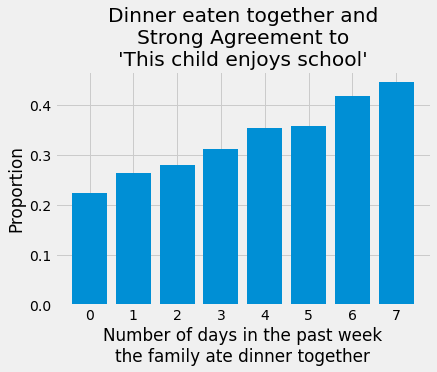

In [91]:
fig, ax = plt.subplots()
ax.bar(enjoys.index,enjoys["proportions"])

ax.set_xticks(np.arange(8))
ax.set_xlabel("Number of days in the past week\nthe family ate dinner together")
ax.set_ylabel("Proportion")
ax.set_title("Dinner eaten together and\nStrong Agreement to\n'This child enjoys school'")

In [18]:
dinnerjoy = proj1_df[["FODINNERX","SEENJOY"]]
dinnerjoy = dinnerjoy[dinnerjoy.SEENJOY != -1]
dinnerjoy = dinnerjoy.groupby(["FODINNERX","SEENJOY"])[["SEENJOY"]].count()
dinnerjoy = dinnerjoy.rename(columns = {'SEENJOY':"counts"})
dinnerjoy = dinnerjoy.reset_index()

enjoys = dinnerjoy[(dinnerjoy.SEENJOY == 1) &(dinnerjoy.SEENJOY == 2)]


## Context: Family income and dinner

In [19]:
# plotting P1HRSWK and number of days dinner

workdinner = proj1_df[["P1HRSWK","FODINNERX"]]
workdinner = workdinner[workdinner.P1HRSWK != -1]
#workdinner = workdinner.groupby(["P1HRSWK","FODINNERX"])[["P1HRSWK"]].count()
#workdinner = workdinner.rename(columns = {"P1HRSWK":"counts"})
#workdinner = workdinner.reset_index()

workdinner0 = workdinner[workdinner.FODINNERX == 0]
workdinner3 = workdinner[workdinner.FODINNERX == 3]
workdinner7 = workdinner[workdinner.FODINNERX == 7]
workdinner3

,P1HRSWK,FODINNERX
4,60,3
16,40,3
18,50,3
28,40,3
29,40,3
...,...,...
15463,50,3
15464,50,3
15472,45,3
15484,60,3


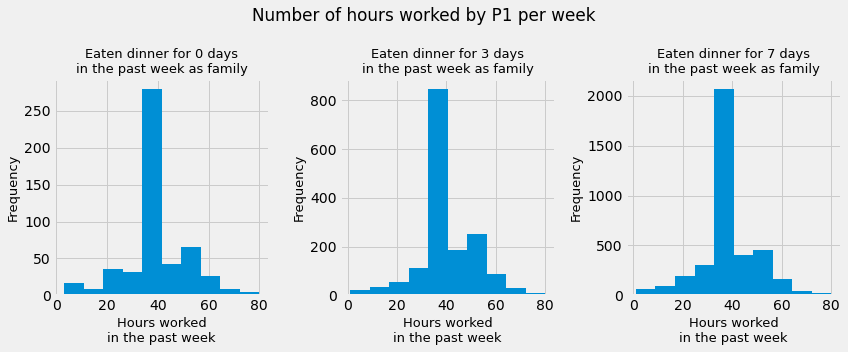

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12,5))
ax1.hist(workdinner0["P1HRSWK"])
#ax1.set_ylim(0,400)
ax2.hist(workdinner3["P1HRSWK"])
#ax2.set_ylim(0,1000)
ax3.hist(workdinner7["P1HRSWK"])
#ax3.set_ylim(0,2500)

fig.suptitle("Number of hours worked by P1 per week")
ax1.set_title("Eaten dinner for 0 days\nin the past week as family", size = 13)
ax1.set_xlabel("Hours worked\nin the past week", size = 13)
ax1.set_ylabel("Frequency", size = 13)
#ax1.scatter(day0, -7, color='maroon', s=30)
ax2.set_title("Eaten dinner for 3 days\nin the past week as family", size = 13)
ax2.set_xlabel("Hours worked\nin the past week", size = 13)
ax2.set_ylabel("Frequency", size = 13)
#ax2.scatter(day3, -22.4, color='maroon', s=30)
ax3.set_title("Eaten dinner for 7 days\nin the past week as family", size = 13)
ax3.set_xlabel("Hours worked\nin the past week", size = 13)
ax3.set_ylabel("Frequency", size = 13)
#ax3.scatter(day7, -56, color='maroon', s=30)
plt.tight_layout()

In [44]:
## total income of family and dinner eated

incomedinner = proj1_df[["FODINNERX","TTLHHINC"]]

incomedinner1 = incomedinner[incomedinner.TTLHHINC == 1]
incomedinner6 = incomedinner[incomedinner.TTLHHINC == 6]
incomedinner11 = incomedinner[incomedinner.TTLHHINC == 11]
incomedinner6

,FODINNERX,TTLHHINC
45,4,6
74,2,6
85,5,6
92,3,6
95,7,6
...,...,...
15415,7,6
15416,3,6
15423,7,6
15461,7,6


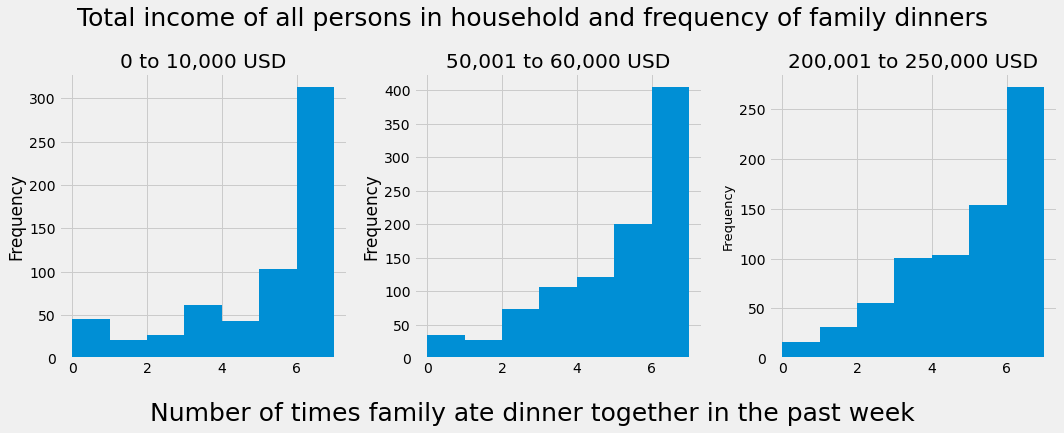

In [72]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,6))
ax1.hist(incomedinner1["FODINNERX"], bins = np.arange(0,8))
ax2.hist(incomedinner6["FODINNERX"], bins = np.arange(0,8))
ax3.hist(incomedinner11["FODINNERX"], bins = np.arange(0,8))

fig.suptitle("Total income of all persons in household and frequency of family dinners", size = 25)
fig.supxlabel("Number of times family ate dinner together in the past week", size = 25)
ax1.set_title("0 to 10,000 USD")
#ax1.set_xlabel("Number of times family ate\ndinner together in the past week")
ax1.set_ylabel("Frequency")
#ax1.scatter(day0, -7, color='maroon')
ax2.set_title("50,001 to 60,000 USD")
#ax2.set_xlabel("Number of times family ate\ndinner together in the past week")
ax2.set_ylabel("Frequency")
#ax2.scatter(day3, -22.4, color='maroon', s=30)
ax3.set_title("200,001 to 250,000 USD")
#ax3.set_xlabel("Number of times family ate\ndinner together in the past week")
ax3.set_ylabel("Frequency", size = 13)
#ax3.scatter(day7, -56, color='maroon', s=30)
plt.tight_layout()


In [84]:
incomedinner = proj1_df[["FODINNERX","TTLHHINC"]]
incomedinner
#incomedinner = incomedinner.groupby(["TTLHHINC","FODINNERX"])[["TTLHHINC"]].count()
#incomedinner = incomedinner.rename(columns = {"TTLHHINC": "counts"}).reset_index()

incomedinner4 = incomedinner[(incomedinner.TTLHHINC == 1) | (incomedinner.TTLHHINC == 2) |
                            (incomedinner.TTLHHINC == 3) | (incomedinner.TTLHHINC == 4)]
incomedinner8 = incomedinner[(incomedinner.TTLHHINC == 5) | (incomedinner.TTLHHINC == 6) |
                            (incomedinner.TTLHHINC == 7) | (incomedinner.TTLHHINC == 8)]
incomedinner12 = incomedinner[(incomedinner.TTLHHINC == 9) | (incomedinner.TTLHHINC == 10) |
                            (incomedinner.TTLHHINC == 11) | (incomedinner.TTLHHINC == 12)]

incomedinner4

,FODINNERX,TTLHHINC
2,7,3
3,7,2
6,7,3
10,0,3
26,4,3
...,...,...
15490,7,1
15491,4,4
15493,5,4
15497,7,2


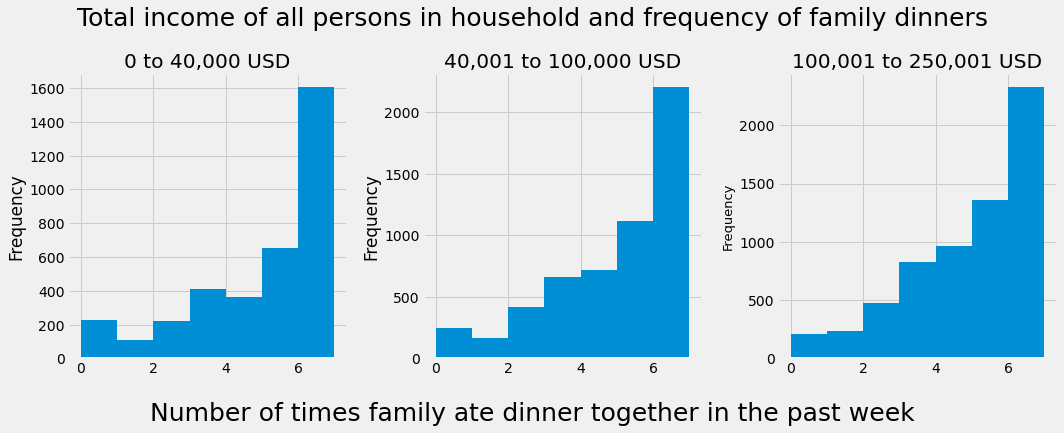

In [83]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,6))
ax1.hist(incomedinner4["FODINNERX"], bins = np.arange(0,8))
ax2.hist(incomedinner8["FODINNERX"], bins = np.arange(0,8))
ax3.hist(incomedinner12["FODINNERX"], bins = np.arange(0,8))

fig.suptitle("Total income of all persons in household and frequency of family dinners", size = 25)
fig.supxlabel("Number of times family ate dinner together in the past week", size = 25)
ax1.set_title("0 to 40,000 USD")
#ax1.set_xlabel("Number of times family ate\ndinner together in the past week")
ax1.set_ylabel("Frequency")
#ax1.scatter(day0, -7, color='maroon')
ax2.set_title("40,001 to 100,000 USD")
#ax2.set_xlabel("Number of times family ate\ndinner together in the past week")
ax2.set_ylabel("Frequency")
#ax2.scatter(day3, -22.4, color='maroon', s=30)
ax3.set_title("100,001 to 250,001 USD")
#ax3.set_xlabel("Number of times family ate\ndinner together in the past week")
ax3.set_ylabel("Frequency", size = 13)
#ax3.scatter(day7, -56, color='maroon', s=30)
plt.tight_layout()